<a href="https://colab.research.google.com/github/ThamirisAdriano/iadt-deteccao-anomalias/blob/master/glr_quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Simulando dados normais de pH

In [5]:
np.random.seed(42)

n_samples = 200
tempo = np.arange(n_samples)
ph_normal = np.random.normal(loc=7.0, scale=0.1, size=n_samples)

Adicionando mudanças abruptas no pH (anomalias)

In [6]:
ph_normal[50:60] += 1.5  # Adição de uma substância alcalina
ph_normal[120:130] -= 1.0  # Adição de uma substância ácida


def calcula_glr(serie, janela):
    glr_scores = []
    n = len(serie)
    for t in range(janela, n - janela):
        antes = serie[t-janela:t]
        depois = serie[t:t+janela]
        media_antes = np.mean(antes)
        media_depois = np.mean(depois)
        var = np.var(serie)
        glr = (janela / 2) * ((media_antes - media_depois)**2) / var
        glr_scores.append(glr)
    return np.array(glr_scores)


Aplicando GLR

In [7]:
janela = 10
glr_scores = calcula_glr(ph_normal, janela)

glr_scores = np.pad(glr_scores, (janela, janela), 'constant', constant_values=0)

Visualizando os dados de pH e os scores GLR

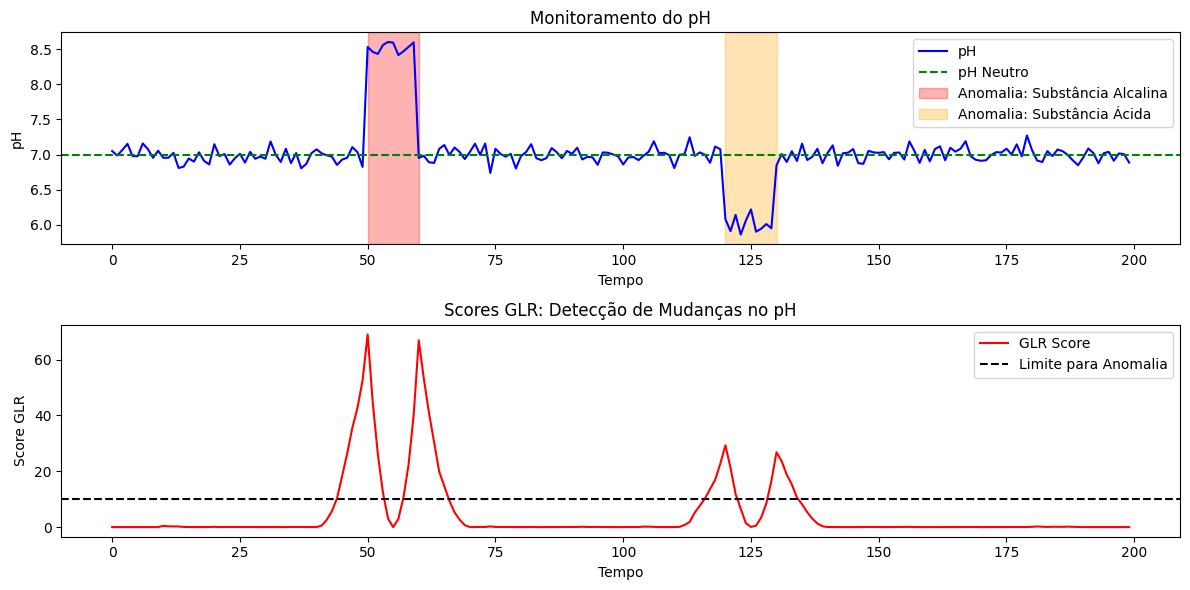

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tempo, ph_normal, label='pH', color='blue')
plt.axhline(y=7.0, color='green', linestyle='--', label='pH Neutro')
plt.axvspan(50, 60, color='red', alpha=0.3, label='Anomalia: Substância Alcalina')
plt.axvspan(120, 130, color='orange', alpha=0.3, label='Anomalia: Substância Ácida')
plt.title('Monitoramento do pH')
plt.xlabel('Tempo')
plt.ylabel('pH')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(tempo, glr_scores, label='GLR Score', color='red')
plt.axhline(y=10, color='black', linestyle='--', label='Limite para Anomalia')
plt.title('Scores GLR: Detecção de Mudanças no pH')
plt.xlabel('Tempo')
plt.ylabel('Score GLR')
plt.legend()

plt.tight_layout()
plt.show()